In [1]:
import pandas as pd

from seaborn import apionly as sns
from matplotlib import pyplot as plt
from scipy.stats import ks_2samp

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:107: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
df_forecast = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/TwoDayForecasts/Data/weights_04110002.csv", index_col = 0)
df_bench = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/TwoDayForecasts/Data/unet_benchmark.csv", index_col = 0)
df_pers = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/TwoDayForecasts/Data/persistance.csv", index_col = 0)

In [4]:
df_bench

,target_length,forecast_length,mean_length,IIEE,a_plus,a_minus,target_area0,target_area1,target_area2,target_area3,target_area4,target_area5,target_area6,forecast_area0,forecast_area1,forecast_area2,forecast_area3,forecast_area4,forecast_area5,forecast_area6
date,,,,,,,,,,,,,,,,,,,,
2021-01-06,1.047252e+07,1.348592e+07,1.197922e+07,250134,48545,201589,2051797.0,249944.0,196204.0,64143.0,180789.0,700031.0,89892.0,2286315.0,214511.0,87556.0,55287.0,139398.0,701770.0,47963.0
2021-01-07,1.275154e+07,1.299904e+07,1.287529e+07,305845,47513,258332,1996638.0,254208.0,252034.0,101773.0,91062.0,733606.0,103479.0,2306839.0,210000.0,88882.0,55715.0,142394.0,680481.0,48489.0
2021-01-08,1.316798e+07,1.483450e+07,1.400124e+07,249423,25303,224120,2003386.0,241433.0,252759.0,93801.0,104109.0,735015.0,102297.0,2276716.0,212303.0,132569.0,74817.0,139557.0,647330.0,49508.0
2021-01-13,1.217150e+07,1.254181e+07,1.235666e+07,252741,3885,248856,1929690.0,196254.0,179607.0,181744.0,169495.0,773023.0,102987.0,2181436.0,233026.0,131166.0,91559.0,123065.0,713033.0,59515.0
2021-01-14,1.180131e+07,1.288454e+07,1.234292e+07,252670,1953,250717,1928736.0,176840.0,182628.0,166560.0,197008.0,761954.0,119074.0,2152946.0,243480.0,124245.0,82844.0,155659.0,711587.0,62039.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,1.051745e+07,9.558192e+06,1.003782e+07,103807,3293,100514,1754449.0,148732.0,70938.0,70184.0,114531.0,1250696.0,123270.0,1900952.0,143151.0,69109.0,36889.0,95759.0,1210801.0,76139.0
2021-12-23,9.490645e+06,9.941696e+06,9.716170e+06,111246,8616,102630,1745723.0,154828.0,69217.0,68531.0,87336.0,1283644.0,123521.0,1884501.0,152119.0,66497.0,34437.0,91298.0,1224286.0,79662.0
2021-12-29,8.930359e+06,9.328243e+06,9.129301e+06,137243,7765,129478,1688295.0,187188.0,90385.0,64957.0,109357.0,1261942.0,130676.0,1891029.0,150151.0,55796.0,35757.0,101761.0,1207479.0,90827.0


In [5]:
df_pers

,target_length,forecast_length,mean_length,IIEE,a_plus,a_minus,target_area0,target_area1,target_area2,target_area3,target_area4,target_area5,target_area6,forecast_area0,forecast_area1,forecast_area2,forecast_area3,forecast_area4,forecast_area5,forecast_area6
date,,,,,,,,,,,,,,,,,,,,
2021-01-06,1.047252e+07,1.416646e+07,1.231949e+07,197382,86416,110966,2051797.0,249944.0,196204.0,64143.0,180789.0,700031.0,89892.0,2077800.0,269028.0,127691.0,67390.0,108167.0,785656.0,97068.0
2021-01-07,1.275154e+07,1.451468e+07,1.363311e+07,228155,72555,155600,1996638.0,254208.0,252034.0,101773.0,91062.0,733606.0,103479.0,2046676.0,312195.0,142665.0,60707.0,121818.0,757427.0,91312.0
2021-01-08,1.316798e+07,1.047252e+07,1.182025e+07,219409,83040,136369,2003386.0,241433.0,252759.0,93801.0,104109.0,735015.0,102297.0,2051797.0,249944.0,196204.0,64143.0,180789.0,700031.0,89892.0
2021-01-13,1.217150e+07,1.044406e+07,1.130778e+07,123929,19098,104831,1929690.0,196254.0,179607.0,181744.0,169495.0,773023.0,102987.0,2008568.0,192367.0,163238.0,132751.0,167743.0,791336.0,76797.0
2021-01-14,1.180131e+07,1.198418e+07,1.189274e+07,106946,12707,94239,1928736.0,176840.0,182628.0,166560.0,197008.0,761954.0,119074.0,1979766.0,209315.0,152621.0,138173.0,193086.0,745176.0,114663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,1.051745e+07,1.108315e+07,1.080030e+07,67603,13512,54091,1754449.0,148732.0,70938.0,70184.0,114531.0,1250696.0,123270.0,1781941.0,182346.0,44769.0,73441.0,106081.0,1220909.0,123313.0
2021-12-23,9.490645e+06,1.012781e+07,9.809229e+06,81639,29112,52527,1745723.0,154828.0,69217.0,68531.0,87336.0,1283644.0,123521.0,1763773.0,170644.0,71281.0,68973.0,100282.0,1232833.0,125014.0
2021-12-29,8.930359e+06,8.462562e+06,8.696460e+06,92671,27555,65116,1688295.0,187188.0,90385.0,64957.0,109357.0,1261942.0,130676.0,1756708.0,165792.0,88290.0,48791.0,108615.0,1257348.0,107256.0


In [3]:
df_bench['IIEE'].nlargest(n=5)

date
2021-04-14    335289
2021-04-15    320478
2021-06-04    308745
2021-05-27    306363
2021-01-07    305845
Name: IIEE, dtype: int64

In [5]:
df_forecast['IIEE'].nlargest(n=5)

date
2021-04-14    214611
2021-06-02    188453
2021-01-08    188365
2021-01-07    180088
2021-06-04    168122
Name: IIEE, dtype: int64

In [4]:
df_pers['IIEE'].nlargest(n=5)

date
2021-04-14    300081
2021-04-15    231392
2021-01-07    228155
2021-01-08    219409
2021-01-06    197382
Name: IIEE, dtype: int64

In [6]:
monthly_mean_bench = df_bench.groupby(pd.PeriodIndex(df_bench.index, freq="M")).mean()
monthly_mean_forecast = df_forecast.groupby(pd.PeriodIndex(df_forecast.index, freq="M")).mean()
monthly_mean_pers = df_pers.groupby(pd.PeriodIndex(df_pers.index, freq="M")).mean()

In [7]:
def plot_area(df, num_classes=7):
    for i in range(num_classes):
        ax = df[f'target_area{i}'].plot(label='target')
        df[f'forecast_area{i}'].plot(ax=ax, label='forecast')
        ax.set_title(f'SIC area for concenration class {i}')
        plt.legend()
        plt.show()

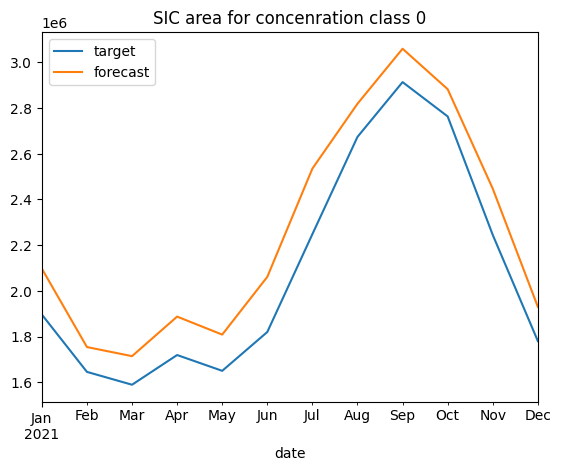

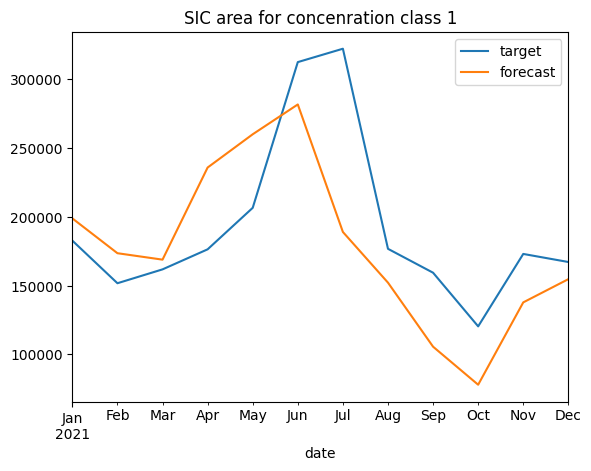

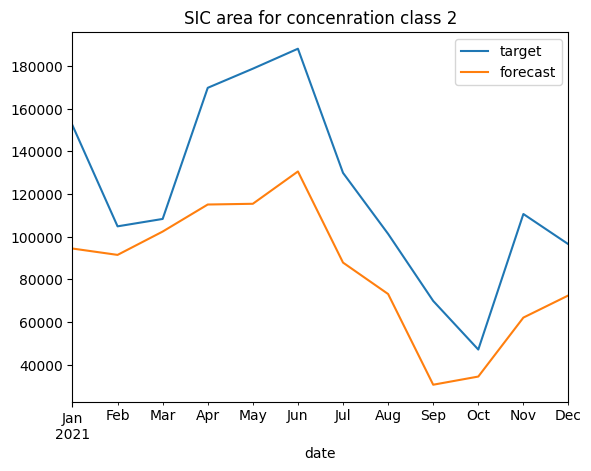

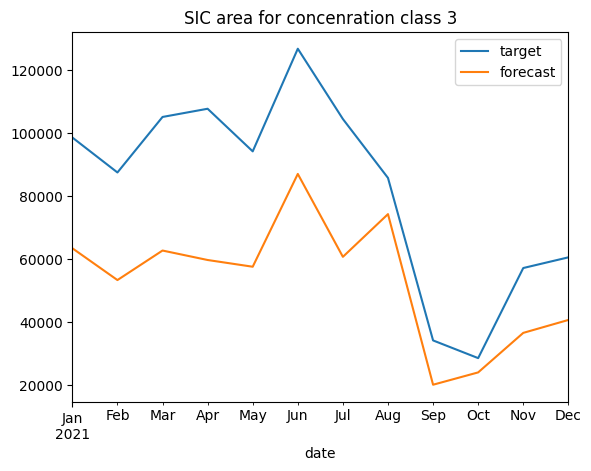

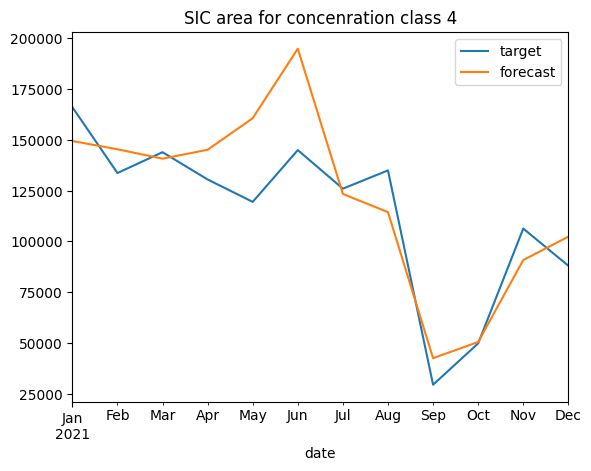

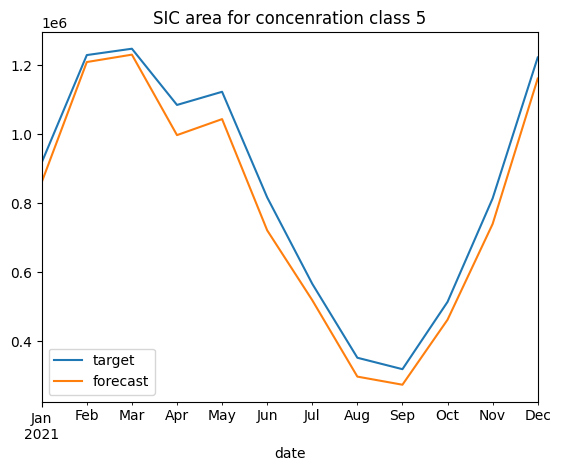

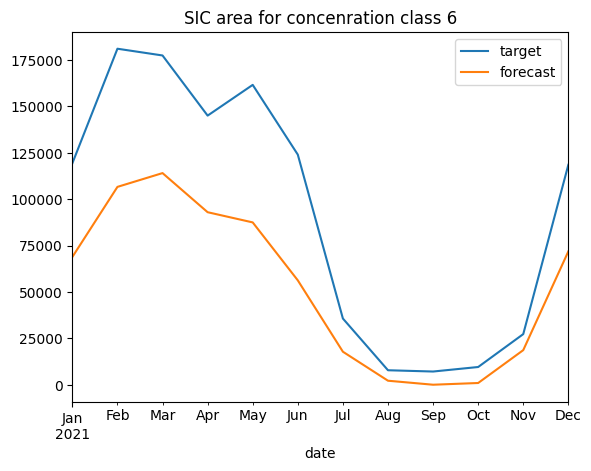

In [8]:
plot_area(monthly_mean_bench)

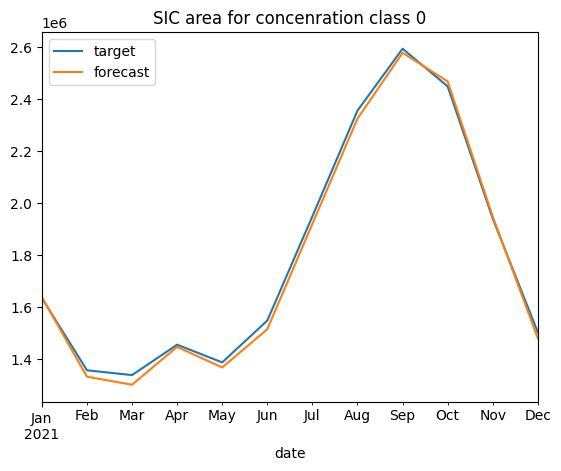

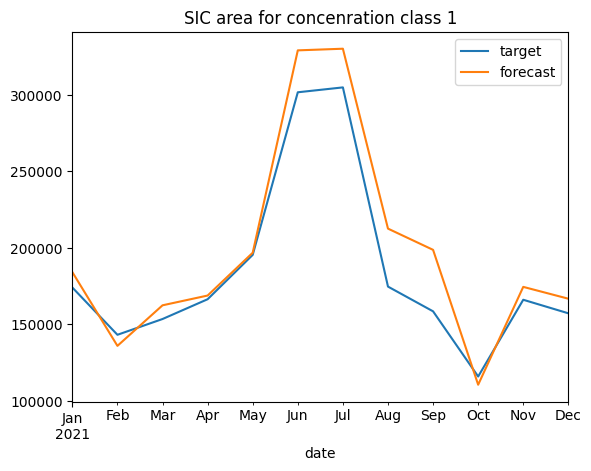

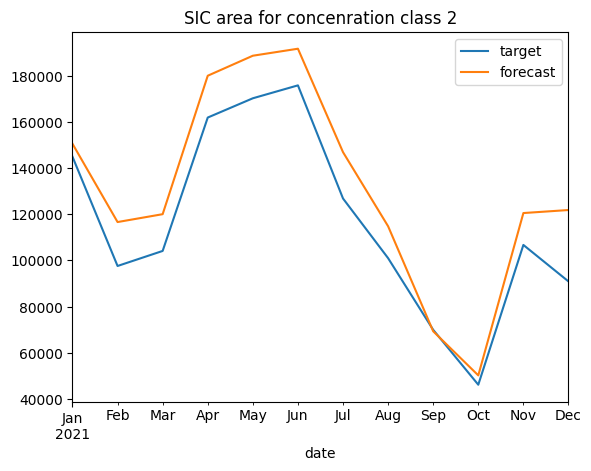

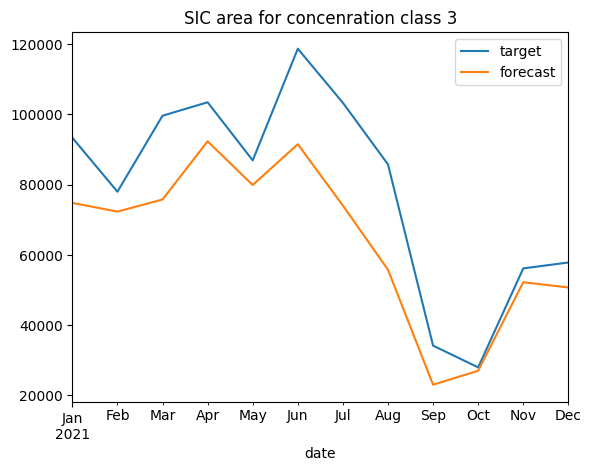

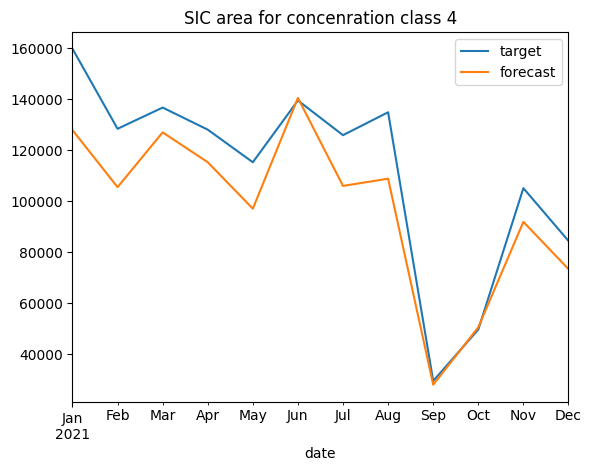

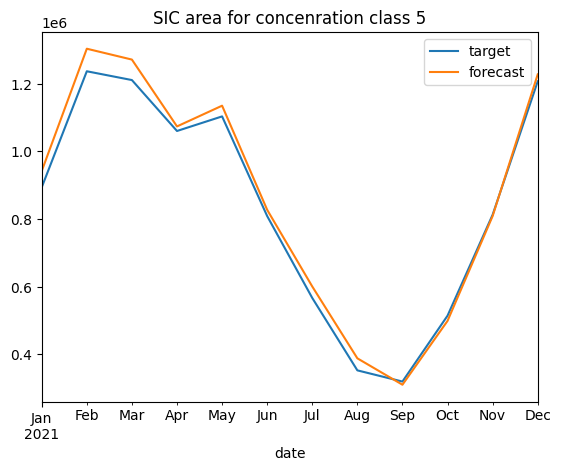

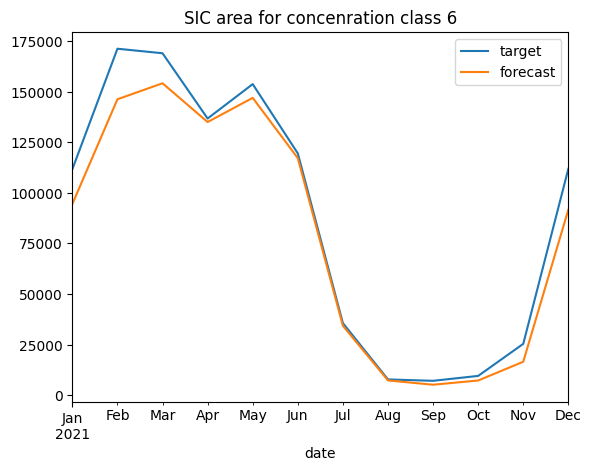

In [8]:
plot_area(monthly_mean_forecast)

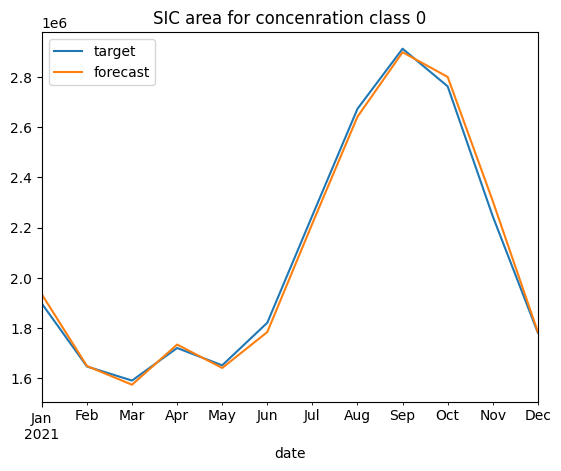

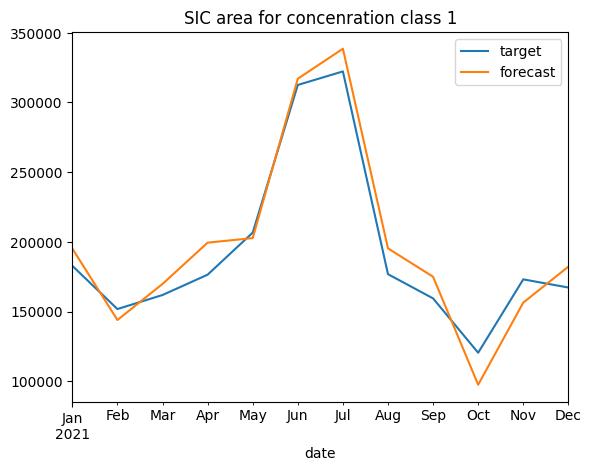

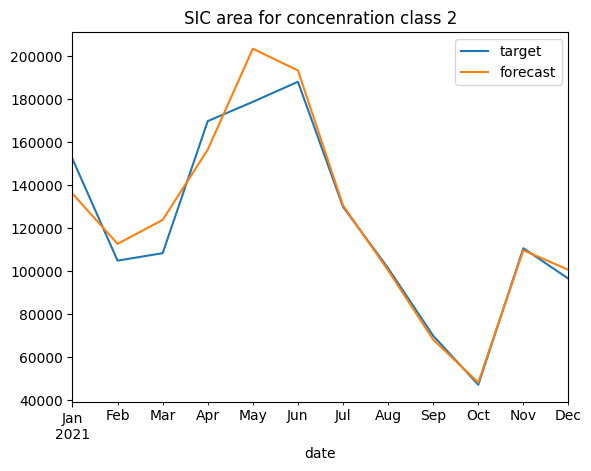

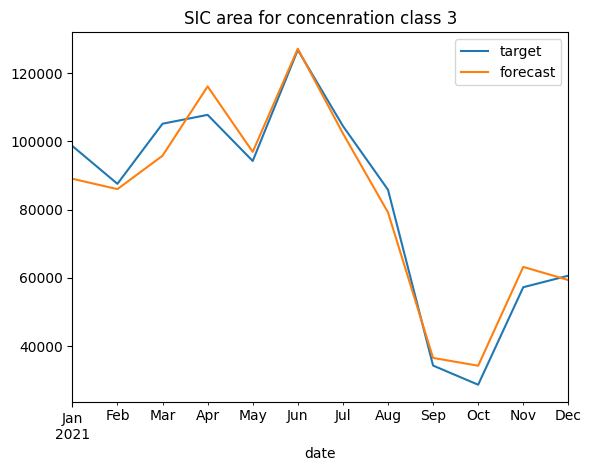

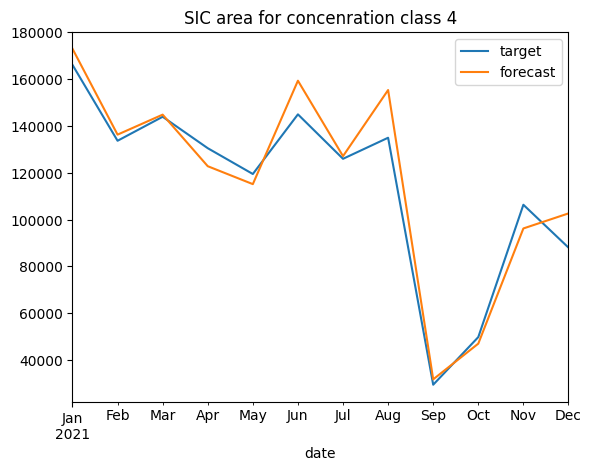

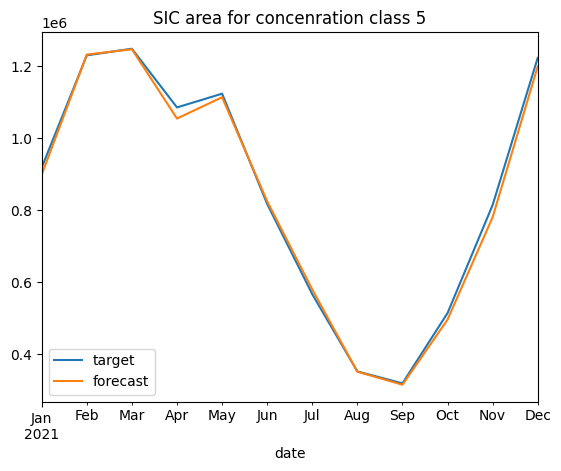

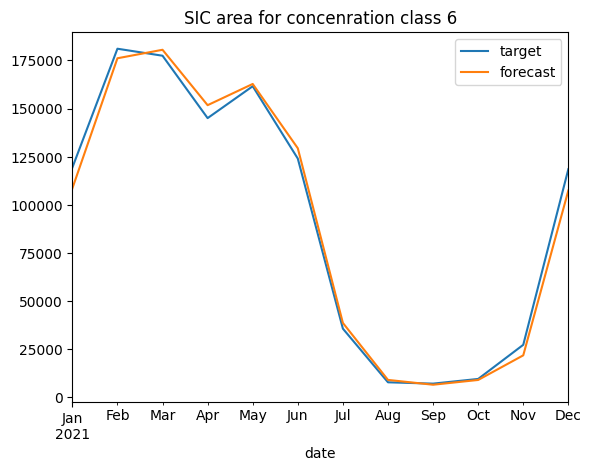

In [10]:
plot_area(monthly_mean_pers)

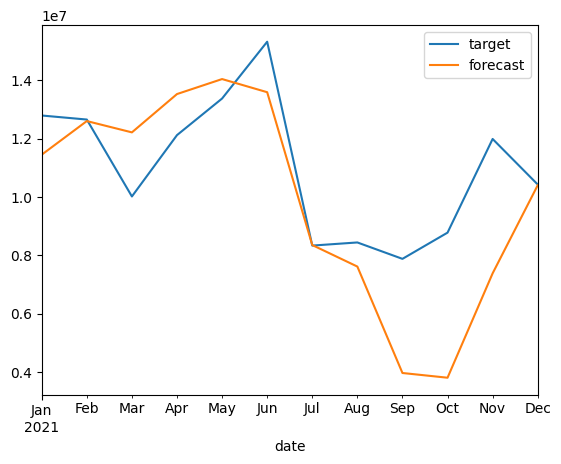

In [11]:
ax = monthly_mean_bench['target_length'].plot(label='target')
monthly_mean_bench['forecast_length'].plot(ax = ax, label = 'forecast')
plt.legend()
plt.show()

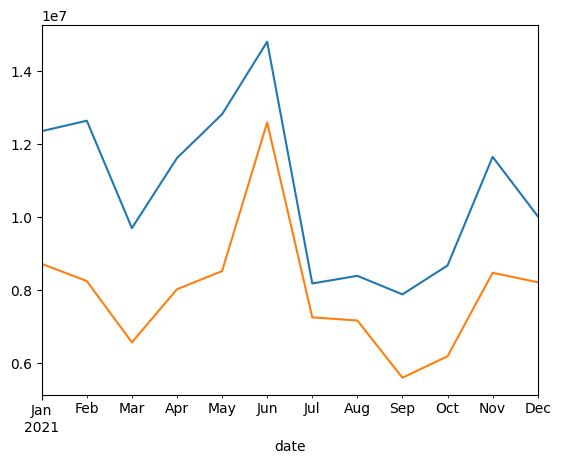

In [9]:
ax = monthly_mean_forecast['target_length'].plot()
monthly_mean_forecast['forecast_length'].plot(ax = ax)
plt.show()

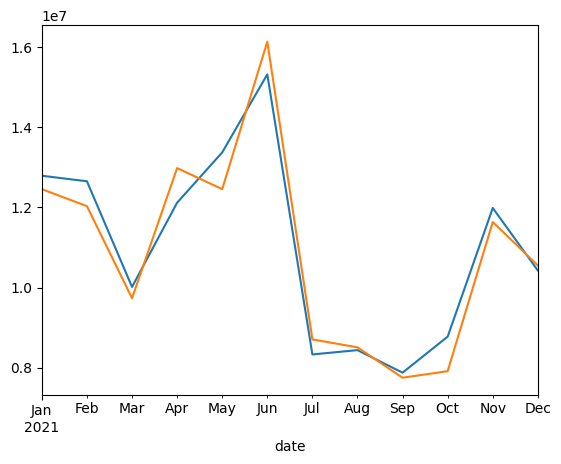

In [10]:
ax = monthly_mean_pers['target_length'].plot()
monthly_mean_pers['forecast_length'].plot(ax = ax)
plt.show()

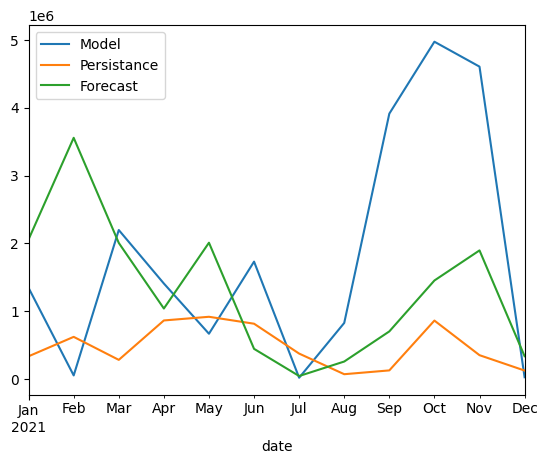

In [14]:
ax = (monthly_mean_bench['target_length'] - monthly_mean_bench['forecast_length']).abs().plot(label = 'Model')
(monthly_mean_pers['target_length'] - monthly_mean_pers['forecast_length']).abs().plot(ax = ax, label = 'Persistance')
(monthly_mean_forecast['target_length'] - monthly_mean_forecast['forecast_length']).abs().plot(ax = ax, label = 'Forecast')
plt.legend()
plt.show()

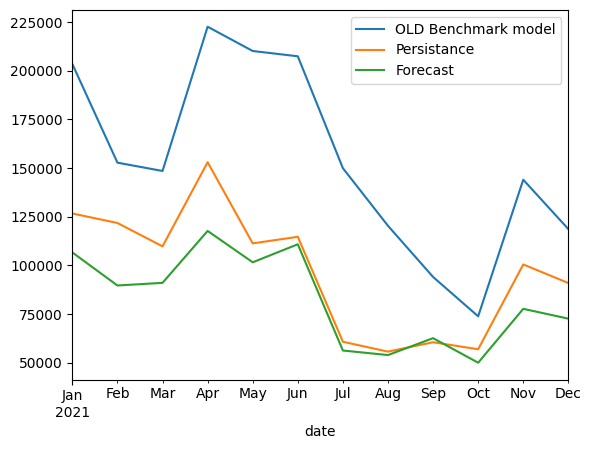

In [13]:
ax = monthly_mean_bench['IIEE'].plot(label = 'OLD Benchmark model')
monthly_mean_pers['IIEE'].plot(ax = ax, label = 'Persistance')
monthly_mean_forecast['IIEE'].plot(ax = ax, label = 'Forecast')
plt.legend()
plt.show()

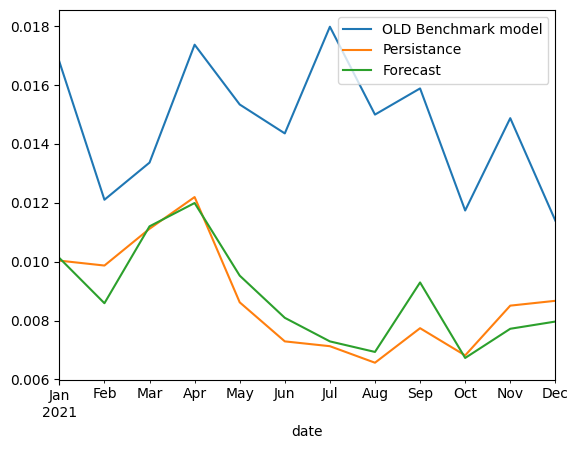

In [14]:
ax = (monthly_mean_bench['IIEE'] / monthly_mean_bench['mean_length']).plot(label = 'OLD Benchmark model')
(monthly_mean_pers['IIEE'] / monthly_mean_pers['mean_length']).plot(ax = ax, label = 'Persistance')
(monthly_mean_forecast['IIEE'] / monthly_mean_forecast['mean_length']).plot(ax = ax, label = 'Forecast')
plt.legend()
plt.show()

In [40]:
df_pers.keys

<bound method NDFrame.keys of             target_length  forecast_length   mean_length    IIEE  a_plus  \
date                                                                       
2021-01-06   1.047252e+07     1.416646e+07  1.231949e+07  197382   86416   
2021-01-07   1.275154e+07     1.451468e+07  1.363311e+07  228155   72555   
2021-01-08   1.316798e+07     1.047252e+07  1.182025e+07  219409   83040   
2021-01-13   1.217150e+07     1.044406e+07  1.130778e+07  123929   19098   
2021-01-14   1.180131e+07     1.198418e+07  1.189274e+07  106946   12707   
...                   ...              ...           ...     ...     ...   
2021-12-22   1.051745e+07     1.108315e+07  1.080030e+07   67603   13512   
2021-12-23   9.490645e+06     1.012781e+07  9.809229e+06   81639   29112   
2021-12-29   8.930359e+06     8.462562e+06  8.696460e+06   92671   27555   
2021-12-30   8.914040e+06     9.235094e+06  9.074567e+06   69133   19312   
2021-12-31   9.419438e+06     8.930359e+06  9.174898e+06  

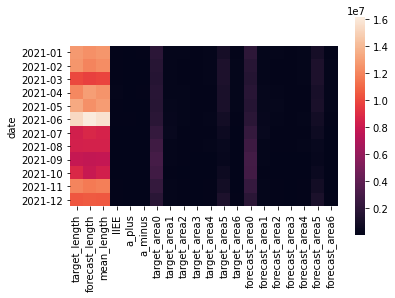

In [56]:
ax = sns.heatmap(monthly_mean_pers, square=True)

In [46]:
piv

,forecast_area0,forecast_area1,forecast_area2,forecast_area3,forecast_area4,forecast_area5,forecast_area6,target_area0,target_area1,target_area2,target_area3,target_area4,target_area5,target_area6
date,,,,,,,,,,,,,,
2021-12,1.783128e+06,182143.818182,100587.727273,59266.545455,102640.727273,1.197603e+06,107430.363636,1.780391e+06,167198.000000,96477.000000,60556.636364,88045.272727,1.221610e+06,118521.818182
2021-11,2.305664e+06,156407.416667,109710.416667,63130.000000,96215.583333,7.798591e+05,21813.000000,2.244737e+06,173059.250000,110651.250000,57161.833333,106334.916667,8.135740e+05,27281.916667
2021-10,2.800974e+06,97504.769231,48179.615385,34098.230769,47023.000000,4.959945e+05,9025.538462,2.763300e+06,120435.769231,47172.846154,28512.769231,49818.384615,5.140065e+05,9554.153846
2021-09,2.899593e+06,174913.785714,68143.285714,36388.428571,31769.500000,3.154404e+05,6551.285714,2.913500e+06,159418.500000,69940.357143,34139.714286,29474.428571,3.192098e+05,7117.500000
2021-08,2.642172e+06,195292.833333,100347.416667,79160.000000,155334.666667,3.514481e+05,9045.500000,2.673772e+06,176778.916667,101346.000000,85812.666667,134960.583333,3.523218e+05,7807.666667
2021-07,2.216293e+06,338445.214286,130569.285714,102367.071429,127093.071429,5.793985e+05,38634.000000,2.248194e+06,322169.142857,129909.142857,104546.928571,125962.571429,5.663436e+05,35674.142857
2021-06,1.782790e+06,316937.384615,193313.692308,127244.538462,159319.153846,8.238259e+05,129369.230769,1.819941e+06,312446.384615,188053.307692,126901.615385,144948.461538,8.165010e+05,124008.076923
2021-05,1.639501e+06,202661.666667,203411.888889,96931.777778,115145.000000,1.112381e+06,162767.111111,1.650001e+06,206563.222222,178706.111111,94260.888889,119471.222222,1.122207e+06,161590.555556
2021-04,1.732916e+06,199369.909091,156506.454545,116170.727273,122801.454545,1.053291e+06,151744.090909,1.719201e+06,176405.818182,169741.909091,107811.727273,130493.090909,1.084119e+06,145027.090909


In [4]:
df_512 = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/TwoDayForecasts/Data/unet_512.csv", index_col = 0)
df_512_focal = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/TwoDayForecasts/Data/unet_512_focal.csv", index_col = 0)

In [5]:
df_512

,target_length,forecast_length,mean_length,IIEE,a_plus,a_minus
date,,,,,,
2021-01-06,1.023912e+07,1.064480e+07,1.044196e+07,233586,53958,179628
2021-01-07,1.227740e+07,1.034837e+07,1.131289e+07,287430,49798,237632
2021-01-08,1.219766e+07,1.066368e+07,1.143067e+07,240339,33738,206601
2021-01-13,1.170586e+07,1.022201e+07,1.096393e+07,196907,4016,192891
2021-01-14,1.083649e+07,1.001890e+07,1.042770e+07,198683,1902,196781
...,...,...,...,...,...,...
2021-12-22,1.021361e+07,7.474777e+06,8.844195e+06,89141,3282,85859
2021-12-23,9.414622e+06,7.475327e+06,8.444974e+06,94273,8927,85346
2021-12-29,9.015655e+06,7.636314e+06,8.325984e+06,119939,9082,110857


In [ ]:
df_512_focal

In [ ]:
df_512.hist('IIEE')

In [ ]:
df_512_focal.hist('IIEE')

In [ ]:
monthly_mean_512 = df_512.groupby(pd.PeriodIndex(df_512.index, freq="M"))['IIEE'].mean()
monthly_mean_512_focal = df_512_focal.groupby(pd.PeriodIndex(df_512_focal.index, freq="M"))['IIEE'].mean()

In [ ]:
ax = monthly_mean_512.plot(label='Crossentropy Loss')
ax.set_title('IIEE for 512 model')
ax.set_ylabel('IIEE')
monthly_mean_512_focal.plot(ax=ax, color='red', label="Focal Loss")
fig = ax.get_figure()
fig.legend()